In [10]:
import pandas as pd
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

In [12]:
Data = pd.read_csv('diamonds.csv',index_col=0)

In [13]:
Data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [14]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53940 entries, 1 to 53940
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.5+ MB


In [15]:
Data.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [17]:
Numerical_var = Data.select_dtypes(include=np.number)
Numerical_var = Numerical_var.drop('price', axis=1)
Numerical_var.head()

,carat,depth,table,x,y,z
1,0.23,61.5,55.0,3.95,3.98,2.43
2,0.21,59.8,61.0,3.89,3.84,2.31
3,0.23,56.9,65.0,4.05,4.07,2.31
4,0.29,62.4,58.0,4.20,4.23,2.63
5,0.31,63.3,58.0,4.34,4.35,2.75


In [18]:
Data.isna().sum()

,0
carat,0
cut,0
color,0
clarity,0
depth,0
table,0
price,0
x,0
y,0
z,0


**Univariate Analysis**

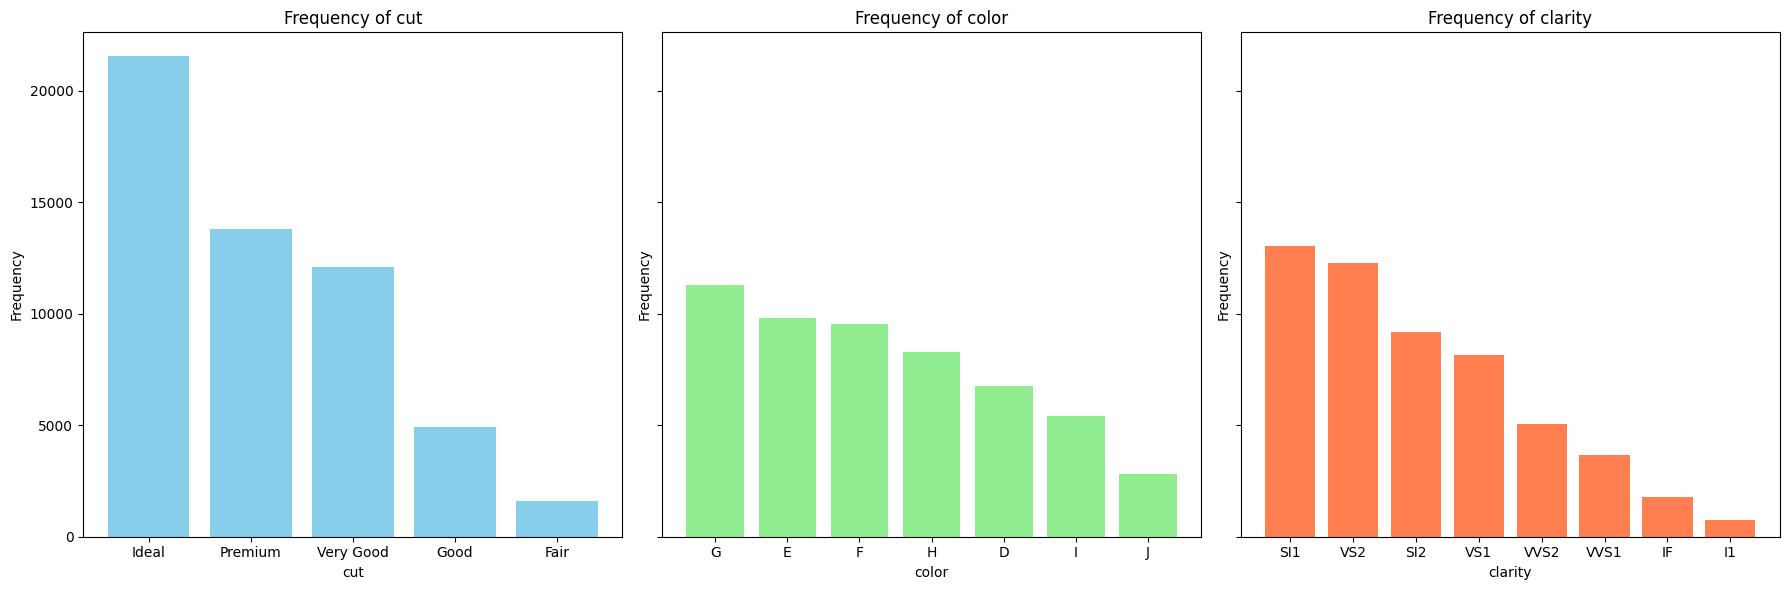

In [7]:
categorical_columns = ['cut', 'color', 'clarity']
colors = ['skyblue', 'lightgreen', 'coral']

# Create a figure with subplots for each categorical column
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Plot bar chart for each categorical column
for i, col in enumerate(categorical_columns):
    category_counts = Data[col].value_counts()
    axes[i].bar(category_counts.index, category_counts.values, color=colors[i])
    axes[i].set_title(f'Frequency of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()

Text(0.5, 0.92, 'Distribution of feature variables')

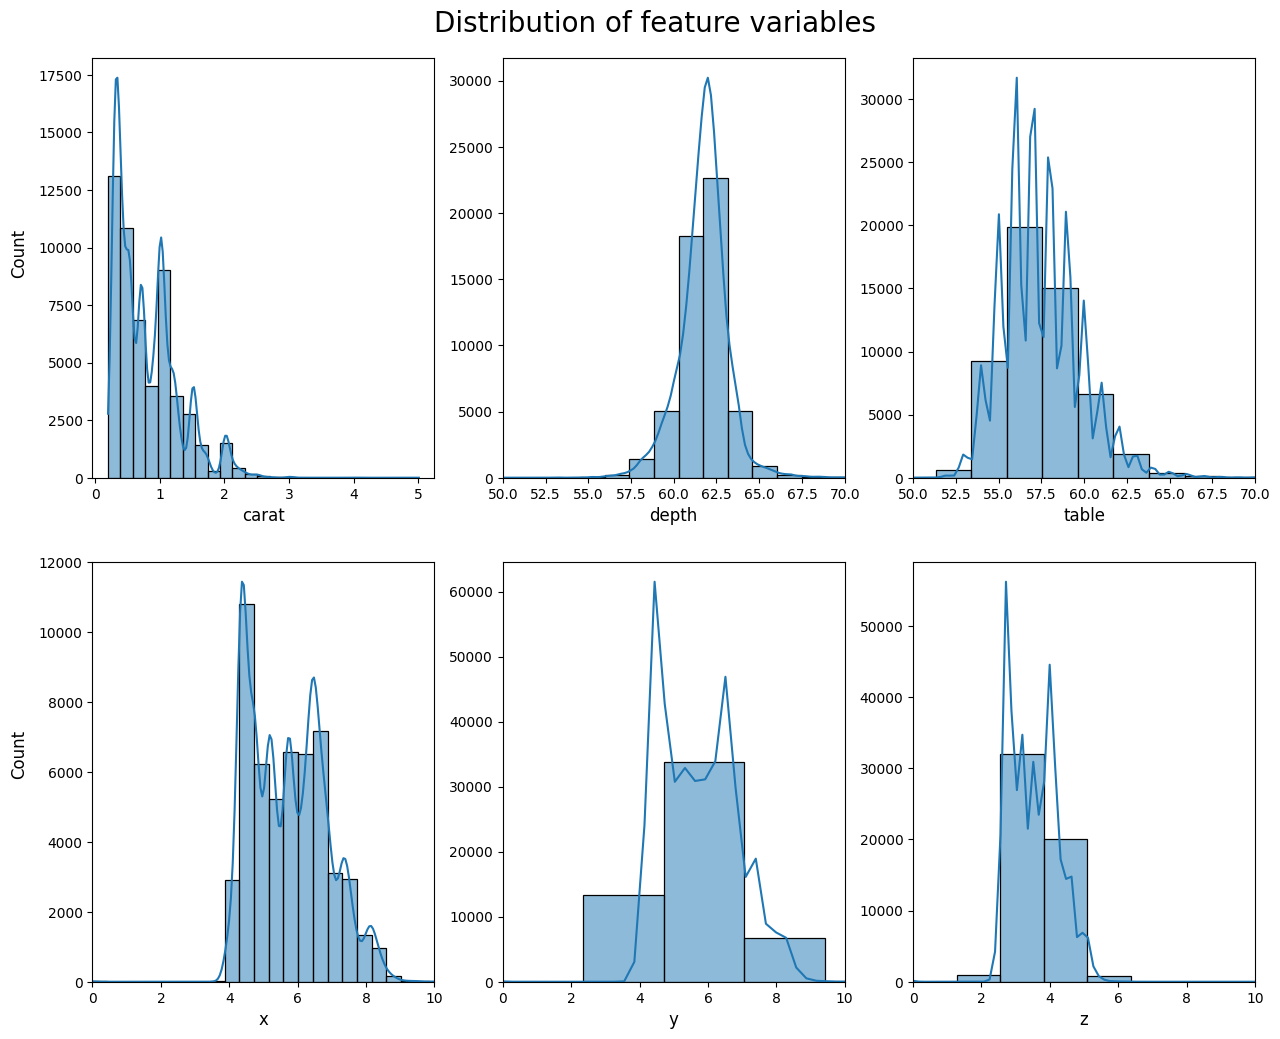

In [22]:
hist_fig, _ = plt.subplots(2,3, figsize=(15,12))
axs= hist_fig.axes
for i, col in enumerate(Numerical_var.columns):
    sns.histplot(data=Data, x=col, kde=True, bins=25, ax=axs[i])

for ax in axs:
    ax.set_xlabel(ax.get_xlabel(), fontsize=12)
    ax.set_ylabel(None)
    if ax.get_xlabel() in ['x','y', 'z']:
        ax.set_xlim(0,10)
    if ax.get_xlabel() in ['table', 'depth']:
        ax.set_xlim(50,70)

hist_fig.text(s="Count", x=0.07, y=0.7, rotation=90, fontsize="large")
hist_fig.supylabel("Count", x=0.07, y=0.3)
hist_fig.figure.suptitle(
        "Distribution of feature variables",
        x=0.5,
        y=0.92,
        fontsize=20,
    )

Text(0.5, 1.0, 'Distribution of Price')

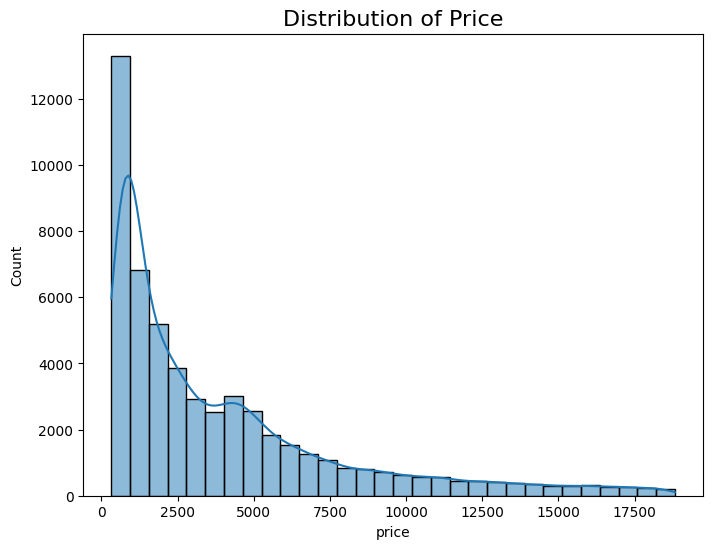

In [23]:
price_hist, axp = plt.subplots(figsize=(8,6))
sns.histplot(data=Data, x='price', kde=True, ax=axp, bins=30)
axp.set_title("Distribution of Price", fontsize=16,)

**Multivariate Analysis**

Text(0.5, 1.0, 'KDE of price')

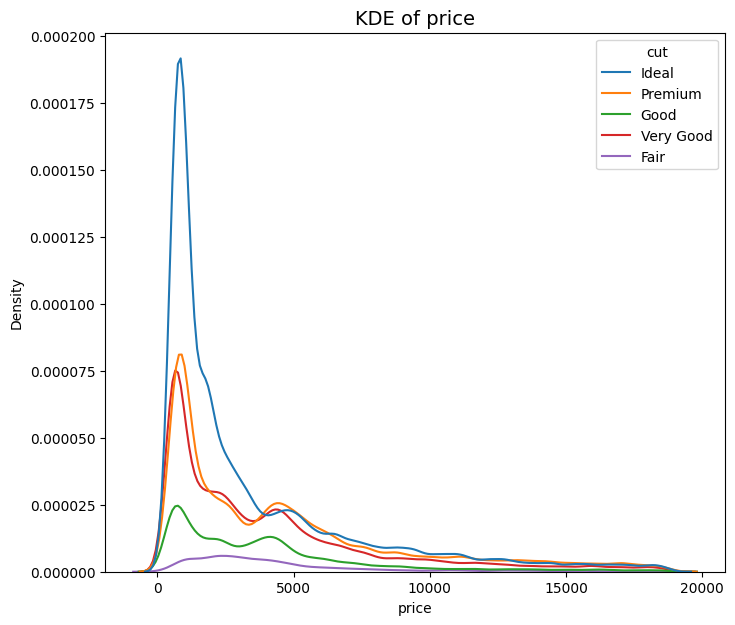

In [24]:
fig_pc, ax_pc = plt.subplots(figsize=(8,7))
sns.kdeplot(data=Data, x="price", hue="cut",bw_adjust=0.5, ax=ax_pc)
ax_pc.set_title("KDE of price", fontsize=14)

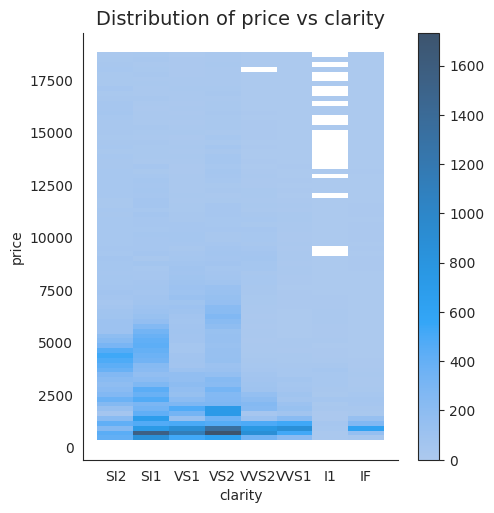

In [25]:
with sns.axes_style("white"):
    p_clar = sns.displot(
        data=Data,
        x="clarity",
        y="price",
        kind="hist",
        cbar=True
    )

    p_clar.figure.axes[0].set_title('Distribution of price vs clarity', fontsize=14)

Text(0.5, 1.0, 'Clarity vs Price(Mean)')

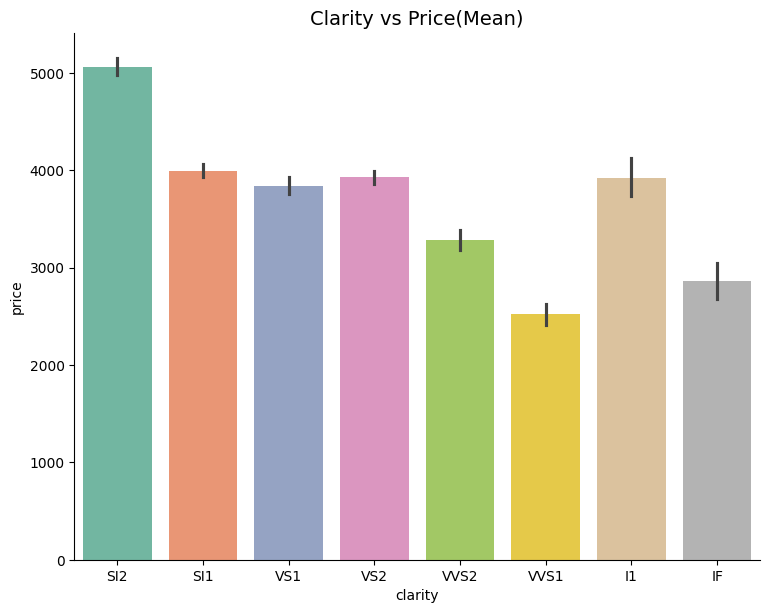

In [27]:
clar_p = sns.catplot(data=Data, kind='bar', x="clarity", y='price',height=6, aspect=1.3, palette='Set2')
clar_p.ax.set_title("Clarity vs Price(Mean)", fontsize=14)

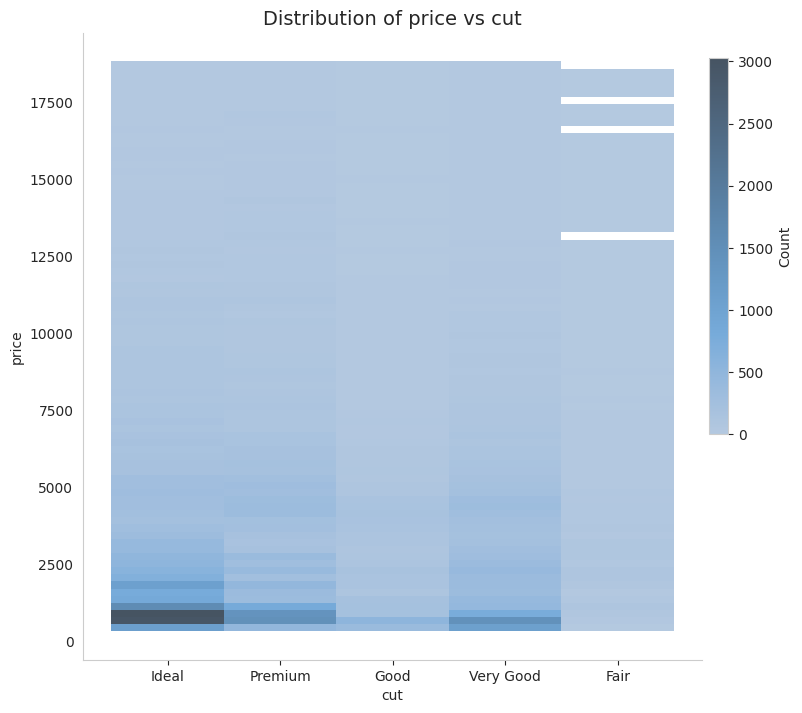

In [29]:
with sns.axes_style("white", rc={'axes.edgecolor':"0.8",'xtick.bottom': True}):
    p_cut = sns.displot(
        data=Data,
        x="cut",
        y="price",
        kind="hist",
        color="xkcd:dusty blue",
        cbar=True,
        cbar_kws = dict(shrink=0.6, anchor=(0, 0.9), label='Count', pad=0.01),
        height=7,
        aspect=1.2
    )
    p_cut.figure.axes[0].set_xlabel(p_cut.figure.axes[0].get_xlabel(), fontsize=10)
    p_cut.figure.axes[0].set_ylabel(p_cut.figure.axes[0].get_ylabel(), fontsize=10)
    p_cut.figure.axes[0].set_title('Distribution of price vs cut', fontsize=14, fontweight="book")

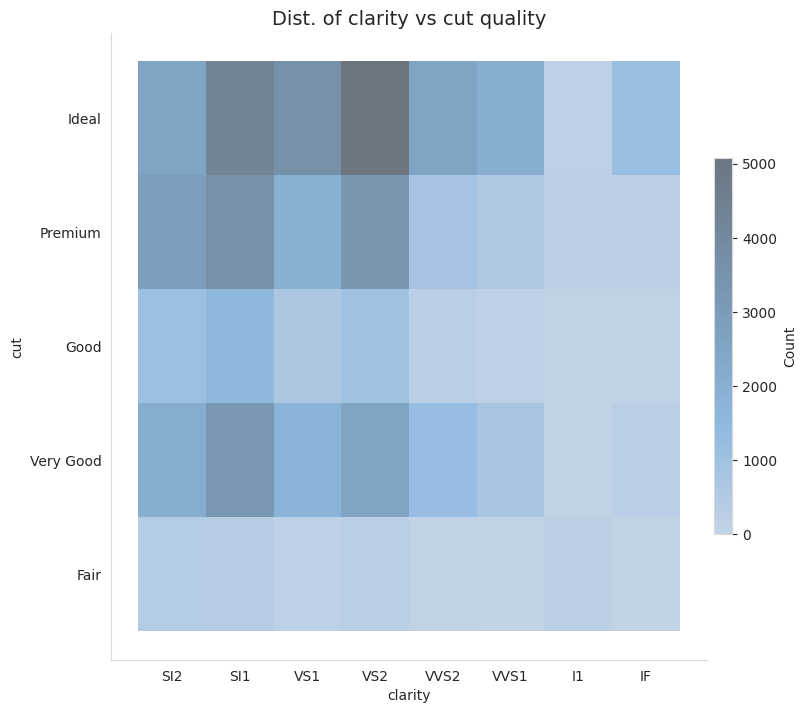

In [30]:
with sns.axes_style("white", rc={"axes.edgecolor":"0.85"}):
    cc = sns.displot(
        data=Data,
        x="clarity",
        y="cut",
        alpha=0.8,
        height=7,
        aspect=1.2,
        color="xkcd:dusty blue",
        cbar=True,
        cbar_kws = dict(shrink=0.6, anchor=(0, 0.5), label='Count', pad=0.01)
    )
    cc.figure.axes[0].set_title("Dist. of clarity vs cut quality", fontsize=14, fontweight="book")
    cc.figure.axes[0].set_xlabel(cc.figure.axes[0].get_xlabel(), fontsize=10)
    cc.figure.axes[0].set_ylabel(cc.figure.axes[0].get_ylabel(), fontsize=10)

In [32]:
x_vars = ['x', 'y', 'z', 'carat', 'depth', 'table']
y_vars = 'price'

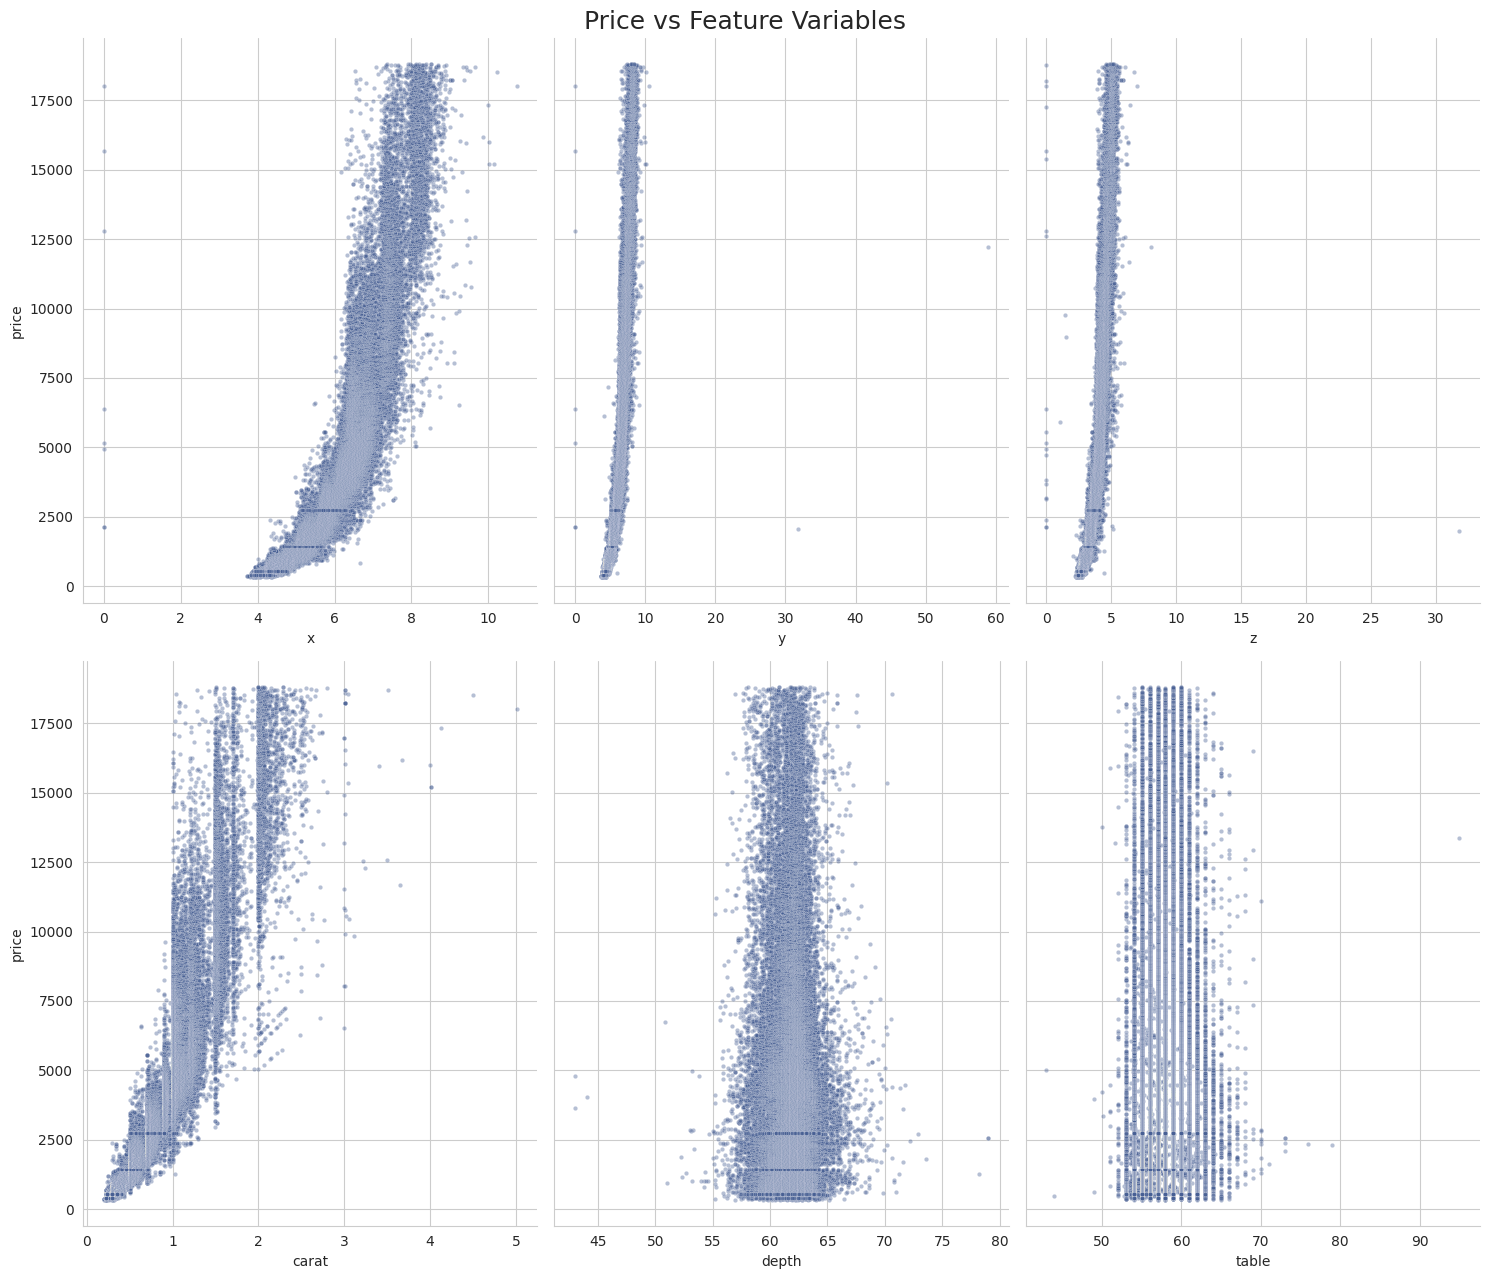

In [33]:
rc_params = {
    "axes.spines.top": False,
    "axes.spines.right": False
}

with sns.axes_style("whitegrid", rc=rc_params):
    fig, axes = plt.subplots(2, 3, figsize=(15, 13), sharey=True)
    axs = axes.flatten()

    for i, x_var in enumerate(x_vars):
        sns.scatterplot(
            data=Data,
            x=x_var,
            y='price',
            ax=axs[i],
            s=10,
            color="xkcd:dusky blue",
            alpha=0.4
        )

    fig.suptitle("Price vs Feature Variables", fontsize=18)
    plt.tight_layout()

Text(0.5, 1.02, 'Feature Variables Relationships')

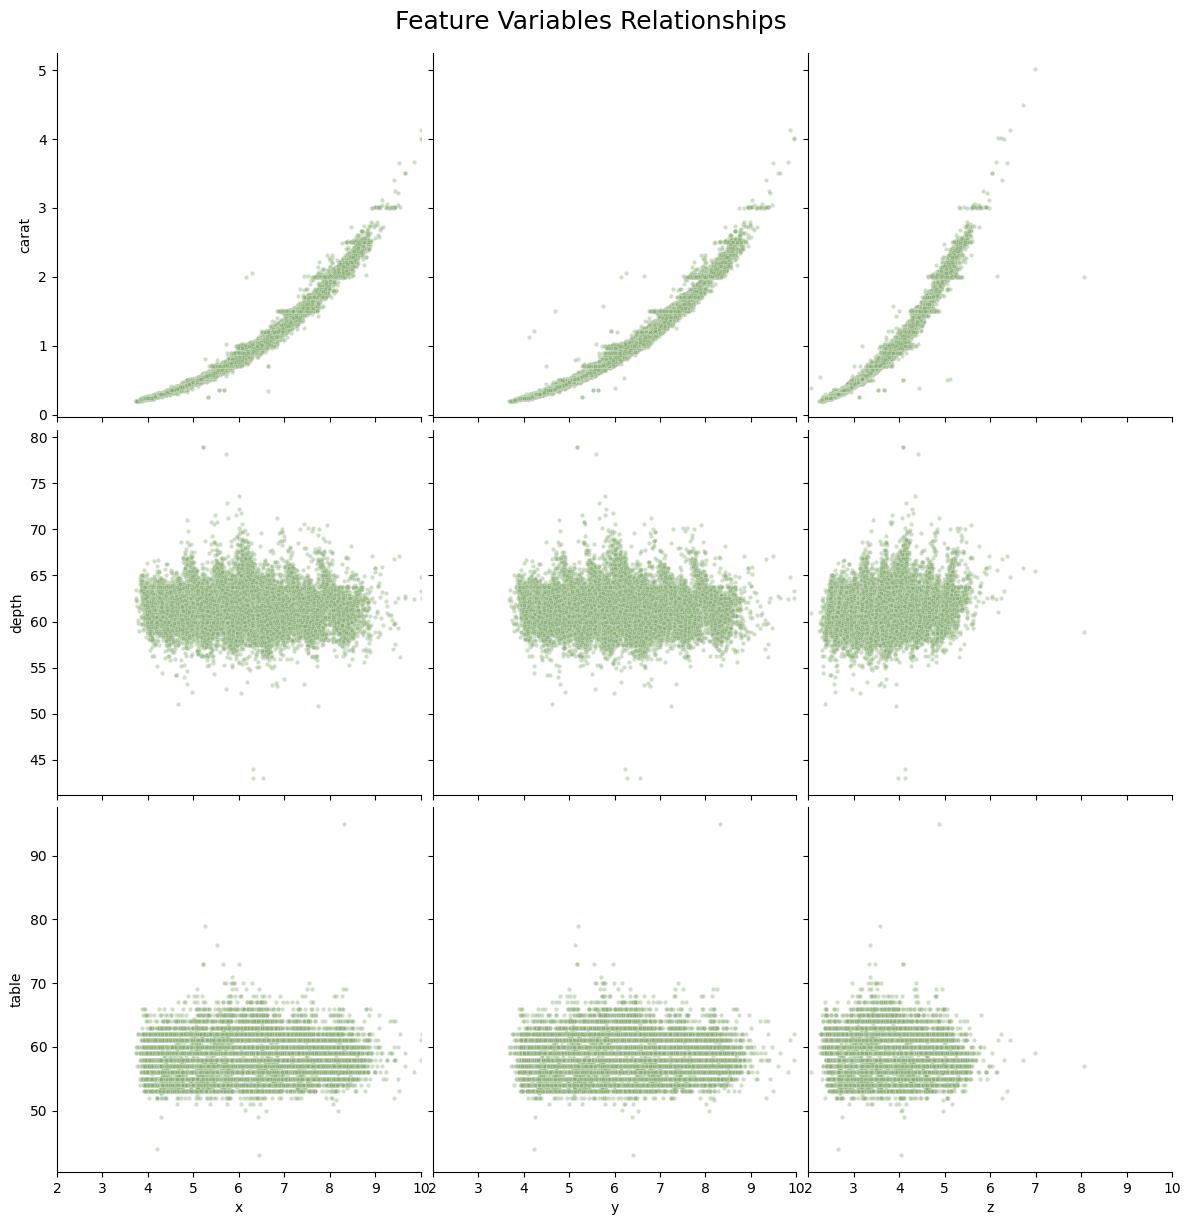

In [36]:
rel = sns.pairplot(
    data=Data,
    height=4,
    x_vars=['x', 'y', 'z'],
    y_vars=["carat", "depth", "table"],
    plot_kws=dict(s=10, color="xkcd:sage", alpha=0.4)
)

rel.tick_params(axis="both", labelsize=10)

for ax in rel.axes.flatten():
    if ax:
        ax.set_xlim(2, 10)

rel.fig.suptitle("Feature Variables Relationships", x=0.5, y=1.02, fontsize=18)

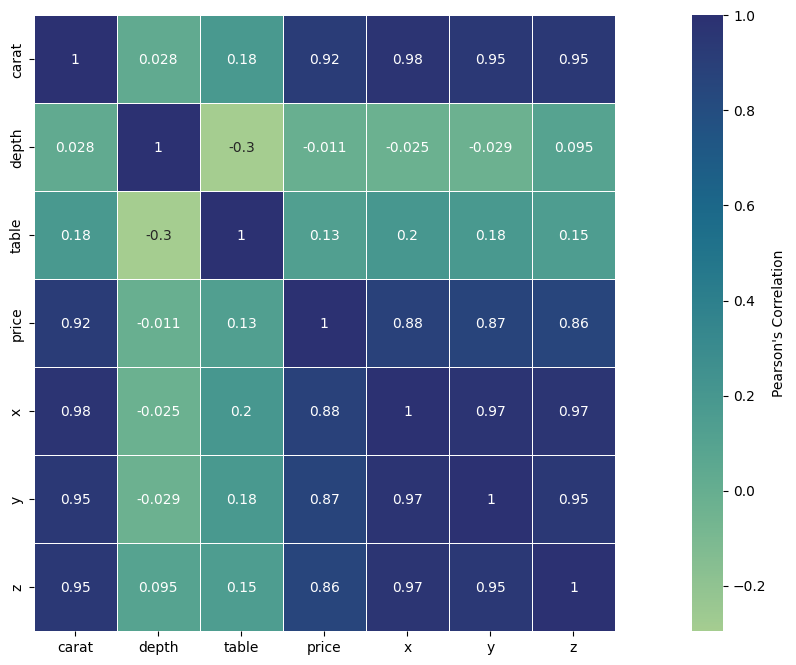

In [35]:
with sns.axes_style(rc={'xtick.bottom': True, 'ytick.left': True}):
    hmap_fig, axh = plt.subplots(figsize=(10,8))
    sns.heatmap(
        data=Data.corr(numeric_only=True),
        cmap='crest',
        annot=True,
        linewidth=0.5,
        ax=axh,
        cbar_kws=dict(anchor=(0, 0.5), label="Pearson's Correlation", pad=0.1)
    )